## Observations and Insights 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_complete_df = pd.merge(study_results,mouse_metadata,on='Mouse ID',how='left')

# Display the data table for preview
study_complete_df


# # Display the data table for preview
# Your tasks are to do the following:
# * Prepare the data.
# * Generate summary statistics.
# * Create bar charts and pie charts.
# * Calculate quartiles, find outliers, and create a box plot.
# * Create a line plot and a scatter plot.
# * Calculate correlation and regression. 
# * Submit your final analysis. 



In [2]:
# Checking the number of mice.
mice_count = len(study_complete_df["Mouse ID"].unique())
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_point=study_complete_df["Timepoint"].value_counts()
time_point

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
number_id_occur = study_complete_df['Mouse ID'].value_counts()
number_id_occur

g989    13
b128    10
q787    10
s337    10
q511    10
        ..
f932     1
b447     1
u153     1
t573     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [5]:
# not sure if this step is necessary, ask tutor 
number_id_occur = number_id_occur.reset_index()
number_id_occur

,index,Mouse ID
0,g989,13
1,b128,10
2,q787,10
3,s337,10
4,q511,10
...,...,...
244,f932,1
245,b447,1
246,u153,1
247,t573,1


In [6]:
# Checking the number of mice in the clean DataFrame.
# duplicate mice
duplicate_mice = number_id_occur.loc[number_id_occur['Mouse ID']>len(time_point)]
duplicate_mice

,index,Mouse ID
0,g989,13


In [7]:
# why are we using 0,0 if there are multiple duplicate mice?
duplicate_mice = duplicate_mice.iloc[0,0]

duplicate_mice

'g989'

In [8]:
type(duplicate_mice)

str

In [9]:
# keep = false means you want to lis ALL duplicates (can exckude first or last)
study_complete_df.loc[study_complete_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Optional: Get all the data for the duplicate mouse ID, (Hardcode: could enter duplicate mice value as string)
all_data_duplicate_df = study_complete_df.loc[study_complete_df["Mouse ID"]==duplicate_mice]
all_data_duplicate_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID, all columns not equal to repeated value
clean_data = study_complete_df.loc[study_complete_df['Mouse ID']!=duplicate_mice]
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# check your work
clean_data['Mouse ID'].unique()

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'z314', 'o848', 'v719', 'q597', 'c895',
      

In [13]:
# check type, series and dataframe function differ
type(clean_data)

pandas.core.frame.DataFrame

In [14]:
# this makes sense because we only removed the one duplicate mouse from our previous unique total
len(clean_data['Mouse ID'].unique())

248

## Summary Statistics

In [15]:
# generate a summary statistics table of mean, median, variance, std dev, and SEM of the tumor volume per regimen
mean_tv = clean_data.groupby('Drug Regimen').mean().iloc[:,1]
# previous comment tell us to set to regimen as index, this is why we are using groupby function 
median_tv = clean_data.groupby('Drug Regimen').median().iloc[:,1]
# remember that the first colon mean all ROWS, 1 means second column 
variance_tv = clean_data.groupby('Drug Regimen').var().iloc[:,1]
# tv stands for tumor volume, sd/std for standard deviation 
sd_tv = clean_data.groupby('Drug Regimen').std().iloc[:,1]
# SEM is the standard deviation of mean of random samples drawn from the original population
sem_tv = clean_data.groupby('Drug Regimen').sem().iloc[:,1]
# print one of these df to look at 
print(mean_tv)
type(mean_tv)

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45728/890246701.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_tv = clean_data.groupby('Drug Regimen').mean().iloc[:,1]
/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45728/890246701.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  median_tv = clean_data.groupby('Drug Regimen').median().iloc[:,1]
/var/folders/bp/kkf4c1nj557c5frmyn420c7c0000gn/T/ipykernel_45728/890246701.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Eith

pandas.core.series.Series

In [16]:
# Assemble the resulting series into a single summary dataframe.
summary_stat_df = pd.DataFrame({'Mean':mean_tv,
                                   'Median':median_tv,
                                   'Variance':variance_tv,
                                   'Std Dev':sd_tv,
                                   'Std Err Mean':sem_tv})

summary_stat_df

,Mean,Median,Variance,Std Dev,Std Err Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_data = clean_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# this method takes str(), (), or a [] of these and computes all the aggregates at once
agg_data

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [18]:
# create a groupby indexed by 'Drug Regimen' column values
drug_regimen_groupby =  clean_data.groupby(['Drug Regimen'])

# the number of timepoints for all mice tested, sorted by descending mouse/time count
total_timepoints = drug_regimen_groupby.size().sort_values(ascending=False)
# print
total_timepoints

# Alternate Method
# count_df = clean_data.groupby(['Drug Regimen']).count()
# print(count_df )

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

Text(0.5, 1.0, 'Treatment by Mouse Count')

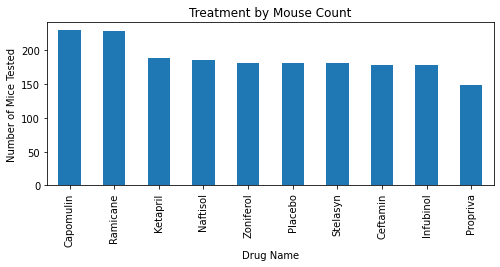

In [23]:
# Generate bar plot showing total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_reg_chart = total_timepoints.plot(kind='bar', figsize=(8,3))

# Set the xlabel and ylabels per directions 
mice_per_reg_chart.set_xlabel("Drug Name")
mice_per_reg_chart.set_ylabel("Number of Mice Tested")
mice_per_reg_chart.set_title("Treatment by Mouse Count")
# plt.show()

# Alternate Method 
# Drug_Regimen = summary_statistics.reset_index().iloc[:,1].to_list()
# Drug_Regimen

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Ceftamin'),
  Text(8, 0, 'Infubinol'),
  Text(9, 0, 'Propriva')])

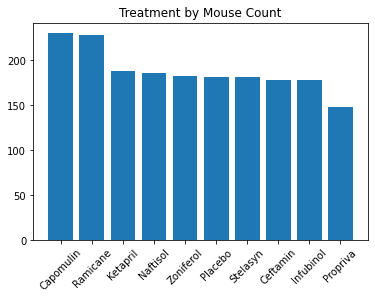

In [20]:
# Generate bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(total_timepoints.index, total_timepoints.values,alpha= 1)
plt.title("Treatment by Mouse Count")
plt.xticks(rotation = 45)

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas, remember to use clean_data
mice_sex = clean_data["Sex"].count()

colors = ["orange", "steelblue"]

mice_sex.plot(kind="pie",autopct="%1.1f%%",title="Mouse Gender", shadow=True, colors=colors)

plt.show()

AttributeError: 'numpy.int64' object has no attribute 'plot'

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count_df = clean_data.groupby(["Sex"]).value_counts()
sex_count_df

Sex     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Age_months  Weight (g)
Female  a203      0          45.000000           0                 Infubinol     20          23            1
                  5          48.508468           0                 Infubinol     20          23            1
        i386      35         64.925420           3                 Infubinol     23          29            1
        i557      35         45.941949           0                 Capomulin     1           24            1
                  30         45.261384           0                 Capomulin     1           24            1
                                                                                                          ..
Male    a411      15         41.484169           1                 Ramicane      3           22            1
                  10         40.759788           1                 Ramicane      3           22            1
                  5     

In [32]:
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
distribution = [sex_count_df['Mouse ID']]

# The colors of each section of the pie chart
colors = ["orange",  "lightskyblue"]

plt.pie(distribution, labels=labels, colors=colors, autopct="%0.1f%%")
plt.title("Mouse Gender by %")

KeyError: 'Mouse ID'

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
